In [1]:
from histimator.models import HistiModel, HistiChannel, HistiSample
from histimator.estimator import BinnedLH

In [2]:
from iminuit import Minuit
import numpy as np

In [3]:
hist_sig = np.asarray([1,2,3,4])
hist_bkg = np.asarray([5,5,5,5])

In [4]:
m = HistiModel('model')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)

In [5]:
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)

In [6]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

In [7]:
data = hist_sig*2 +hist_bkg

chan.SetData(data)
m.AddChannel(chan)

In [8]:
blh = BinnedLH(m, bound=(0,4))

In [9]:
params = m.Parameters()
print "params are ",params

params are  {'error_BackgroundNorm': 50.0, 'error_SigXSecOverSM': 1.5, 'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'SigXSecOverSM': 1.0, 'errordef': 1, 'limit_BackgroundNorm': (0, 100)}


In [10]:
minimiser = Minuit(blh, **params)

In [11]:
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

args are (1.0, 1.0000000000000009)
parameters are {'BackgroundNorm': 1.0000000000000009, 'SigXSecOverSM': 1.0}
args are (1.0162860136654166, 1.0000000000000009)
parameters are {'BackgroundNorm': 1.0000000000000009, 'SigXSecOverSM': 1.0162860136654166}
args are (0.9837800284575102, 1.0000000000000009)
parameters are {'BackgroundNorm': 1.0000000000000009, 'SigXSecOverSM': 0.9837800284575102}
args are (1.0016256648971522, 1.0000000000000009)
parameters are {'BackgroundNorm': 1.0000000000000009, 'SigXSecOverSM': 1.0016256648971522}
args are (0.9983749955312737, 1.0000000000000009)
parameters are {'BackgroundNorm': 1.0000000000000009, 'SigXSecOverSM': 0.9983749955312737}
args are (1.0, 1.0805893895724283)
parameters are {'BackgroundNorm': 1.0805893895724283, 'SigXSecOverSM': 1.0}
args are (1.0, 0.9225030171868931)
parameters are {'BackgroundNorm': 0.9225030171868931, 'SigXSecOverSM': 1.0}
args are (1.0, 1.0079198630439157)
parameters are {'BackgroundNorm': 1.0079198630439157, 'SigXSecOverSM

FCN = 8.26387865588 
 TOTAL NCALL = 45 
 NCALLS = 45 
 
 
 EDM = 2.92915880923e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39958,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.979391,0,0,0.0,100.0,


args are (1.9999093299072674, 1.0000282633233104)
parameters are {'BackgroundNorm': 1.0000282633233104, 'SigXSecOverSM': 1.9999093299072674}
args are (2.0220341966657616, 1.0000282633233104)
parameters are {'BackgroundNorm': 1.0000282633233104, 'SigXSecOverSM': 2.0220341966657616}
args are (1.9776614245391548, 1.0000282633233104)
parameters are {'BackgroundNorm': 1.0000282633233104, 'SigXSecOverSM': 1.9776614245391548}
args are (2.0021274434116294, 1.0000282633233104)
parameters are {'BackgroundNorm': 1.0000282633233104, 'SigXSecOverSM': 2.0021274434116294}
args are (1.9976899859918251, 1.0000282633233104)
parameters are {'BackgroundNorm': 1.0000282633233104, 'SigXSecOverSM': 1.9976899859918251}
args are (2.0012035564484503, 1.0000282633233104)
parameters are {'BackgroundNorm': 1.0000282633233104, 'SigXSecOverSM': 2.0012035564484503}
args are (1.9986146845698425, 1.0000282633233104)
parameters are {'BackgroundNorm': 1.0000282633233104, 'SigXSecOverSM': 1.9986146845698425}
args are (1.9

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39925,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.978772,0,0,0.0,100.0,


+,SigXSecOverSM,BackgroundNorm
SigXSecOverSM,1.00,-0.90
BackgroundNorm,-0.90,1.00


args are (4.399492378003733, 0.3132447614417999)
parameters are {'BackgroundNorm': 0.3132447614417999, 'SigXSecOverSM': 4.399492378003733}
args are (4.399492378003733, 0.31958895108021856)
parameters are {'BackgroundNorm': 0.31958895108021856, 'SigXSecOverSM': 4.399492378003733}
args are (4.399492378003733, 0.30696397637027806)
parameters are {'BackgroundNorm': 0.30696397637027806, 'SigXSecOverSM': 4.399492378003733}
args are (4.399492378003733, 0.31387632733307913)
parameters are {'BackgroundNorm': 0.31387632733307913, 'SigXSecOverSM': 4.399492378003733}
args are (4.399492378003733, 0.31261382959625883)
parameters are {'BackgroundNorm': 0.31261382959625883, 'SigXSecOverSM': 4.399492378003733}
args are (4.399492378003733, 0.23833335963582836)
parameters are {'BackgroundNorm': 0.23833335963582836, 'SigXSecOverSM': 4.399492378003733}
args are (4.399492378003733, 0.1363097034048577)
parameters are {'BackgroundNorm': 0.1363097034048577, 'SigXSecOverSM': 4.399492378003733}
args are (4.39949

Error,-1.98618856646,1.00009067009
Valid,True,True
At Limit,False,True
Max FCN,False,False
New Min,False,False


args are (0.3219504483678247, 1.9794197493243264)
parameters are {'BackgroundNorm': 1.9794197493243264, 'SigXSecOverSM': 0.3219504483678247}
args are (0.3337455172490541, 1.9794197493243264)
parameters are {'BackgroundNorm': 1.9794197493243264, 'SigXSecOverSM': 0.3337455172490541}
args are (0.3103424726373599, 1.9794197493243264)
parameters are {'BackgroundNorm': 1.9794197493243264, 'SigXSecOverSM': 0.3103424726373599}
args are (0.3232665416614273, 1.9794197493243264)
parameters are {'BackgroundNorm': 1.9794197493243264, 'SigXSecOverSM': 0.3232665416614273}
args are (0.32063671745325634, 1.9794197493243264)
parameters are {'BackgroundNorm': 1.9794197493243264, 'SigXSecOverSM': 0.32063671745325634}
args are (0.33507884194613896, 1.9794197493243264)
parameters are {'BackgroundNorm': 1.9794197493243264, 'SigXSecOverSM': 0.33507884194613896}
args are (0.3506351343687487, 1.9794197493243264)
parameters are {'BackgroundNorm': 1.9794197493243264, 'SigXSecOverSM': 0.3506351343687487}
args are 

Error,-0.756705470452,1.08484159596
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 1.0848415959603632, 'lower': -0.7567054704517623, 'at_lower_limit': False, 'min': 1.0000282633233104, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 82},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 1.0000906700927326, 'lower': -1.9861885664600047, 'at_lower_limit': False, 'min': 1.9999093299072674, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 53}}

args are (-2.7985965568498106, 1.0000282633233104)
parameters are {'BackgroundNorm': 1.0000282633233104, 'SigXSecOverSM': -2.7985965568498106}
args are (-2.7985965568498106, nan)
parameters are {'BackgroundNorm': nan, 'SigXSecOverSM': -2.7985965568498106}
args are (-2.7985965568498106, nan)
parameters are {'BackgroundNorm': nan, 'SigXSecOverSM': -2.7985965568498106}
args are (-2.7985965568498106, nan)
parameters are {'BackgroundNorm': nan, 'SigXSecOverSM': -2.7985965568498106}
args are (-2.7985965568498106, nan)
parameters are {'BackgroundNorm': nan, 'SigXSecOverSM': -2.7985965568498106}
args are (-2.7985965568498106, nan)
parameters are {'BackgroundNorm': nan, 'SigXSecOverSM': -2.7985965568498106}
args are (-2.7985965568498106, nan)
parameters are {'BackgroundNorm': nan, 'SigXSecOverSM': -2.7985965568498106}
args are (-2.7985965568498106, nan)
parameters are {'BackgroundNorm': nan, 'SigXSecOverSM': -2.7985965568498106}
args are (-2.7985965568498106, nan)
parameters are {'BackgroundNor

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     SigXSecOverSM = -2.798597
    BackgroundNorm = +1.000028

  
/Users/vince/tensorflow/lib/python2.7/site-packages/scipy/stats/_discrete_distns.py:462: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     SigXSecOverSM = -2.798597
    BackgroundNorm = nan

  
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     SigXSecOverSM = -2.467665
    BackgroundNorm = +1.000028

  
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     SigXSecOverSM = -2.467665
    BackgroundNo

args are (-0.15114503312176764, 0.9874749714727737)
parameters are {'BackgroundNorm': 0.9874749714727737, 'SigXSecOverSM': -0.15114503312176764}
args are (-0.15114503312176764, 1.0012879093990346)
parameters are {'BackgroundNorm': 1.0012879093990346, 'SigXSecOverSM': -0.15114503312176764}
args are (-0.15114503312176764, 0.9987694020763882)
parameters are {'BackgroundNorm': 0.9987694020763882, 'SigXSecOverSM': -0.15114503312176764}
args are (-0.15114503312176764, 1.7634166299063614)
parameters are {'BackgroundNorm': 1.7634166299063614, 'SigXSecOverSM': -0.15114503312176764}
args are (-0.15114503312176764, 1.92527673937119)
parameters are {'BackgroundNorm': 1.92527673937119, 'SigXSecOverSM': -0.15114503312176764}
args are (-0.15114503312176764, 2.04334146536434)
parameters are {'BackgroundNorm': 2.04334146536434, 'SigXSecOverSM': -0.15114503312176764}
args are (-0.15114503312176764, 2.0438700182557277)
parameters are {'BackgroundNorm': 2.0438700182557277, 'SigXSecOverSM': -0.151145033121

args are (4.150963692936302, 0.1538057525463543)
parameters are {'BackgroundNorm': 0.1538057525463543, 'SigXSecOverSM': 4.150963692936302}
args are (4.150963692936302, 0.1535769207366644)
parameters are {'BackgroundNorm': 0.1535769207366644, 'SigXSecOverSM': 4.150963692936302}
args are (4.481895133402308, 1.0000282633233104)
parameters are {'BackgroundNorm': 1.0000282633233104, 'SigXSecOverSM': 4.481895133402308}
args are (4.481895133402308, 1.0126600380433393)
parameters are {'BackgroundNorm': 1.0126600380433393, 'SigXSecOverSM': 4.481895133402308}
args are (4.481895133402308, 0.9874749714727737)
parameters are {'BackgroundNorm': 0.9874749714727737, 'SigXSecOverSM': 4.481895133402308}
args are (4.481895133402308, 1.0012879093990346)
parameters are {'BackgroundNorm': 1.0012879093990346, 'SigXSecOverSM': 4.481895133402308}
args are (4.481895133402308, 0.9987694020763882)
parameters are {'BackgroundNorm': 0.9987694020763882, 'SigXSecOverSM': 4.481895133402308}
args are (4.481895133402308

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/iminuit/_plotting.py:51: RuntimeWarning: band and text is requested but the bound is too narrow.
  warnings.warn(RuntimeWarning('band and text is requested but'


(array([-2.79859656, -2.46766512, -2.13673368, -1.80580224, -1.47487079,
        -1.14393935, -0.81300791, -0.48207647, -0.15114503,  0.17978641,
         0.51071785,  0.84164929,  1.17258073,  1.50351217,  1.83444361,
         2.16537505,  2.49630649,  2.82723793,  3.15816937,  3.48910081,
         3.82003225,  4.15096369,  4.48189513,  4.81282657,  5.14375801,
         5.47468945,  5.8056209 ,  6.13655234,  6.46748378,  6.79841522]),
 array([         nan,          nan,          nan,          nan,
                 nan,  10.72445366,  10.24510163,   9.81472351,
          9.43460928,   9.10597749,   8.82996365,   8.60760593,
          8.43982068,   8.32739539,   8.27096054,   8.27095718,
          8.32762813,   8.44101611,   8.61090781,   8.836852  ,
          9.11815042,   9.45388781,   9.84286232,  10.31346053,
         10.96279651,  11.77804657,  12.73972129,  13.83157441,
         15.03992675,  16.35314507]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
   

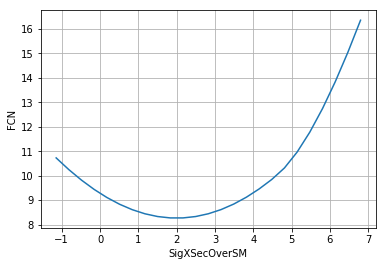

In [12]:
%matplotlib inline
minimiser.draw_mnprofile('SigXSecOverSM')

In [13]:
m2 = HistiModel('newmodel')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)

In [14]:
background.AddOverallSys("NormSystUncertainty",.9,1.2)

adding np NormSystUncertainty {'nom': 0.29999999999999993, 'range': (0, 100)}


In [15]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

data = hist_sig*2 +hist_bkg

chan.SetData(data)
m2.AddChannel(chan)

In [16]:
blh = BinnedLH(m2, bound=(0,4))
params = m2.Parameters()
print "params are ",params

params are  {'error_BackgroundNorm': 50.0, 'error_SigXSecOverSM': 1.5, 'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'NormSystUncertainty': 0.29999999999999993, 'SigXSecOverSM': 1.0, 'errordef': 1, 'error_NormSystUncertainty': 50.0, 'limit_NormSystUncertainty': (0, 100), 'limit_BackgroundNorm': (0, 100)}


In [17]:
minimiser = Minuit(blh, **params)
minimiser.migrad()
#minimiser.hesse()
#minimiser.minos()

args are (1.0, 1.0000000000000009, 0.30000000000000027)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 0.30000000000000027, 'SigXSecOverSM': 1.0}
args are (1.0162860136654166, 1.0000000000000009, 0.30000000000000027)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 0.30000000000000027, 'SigXSecOverSM': 1.0162860136654166}
args are (0.9837800284575102, 1.0000000000000009, 0.30000000000000027)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 0.30000000000000027, 'SigXSecOverSM': 0.9837800284575102}
args are (1.0016256648971522, 1.0000000000000009, 0.30000000000000027)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 0.30000000000000027, 'SigXSecOverSM': 1.0016256648971522}
args are (0.9983749955312737, 1.0000000000000009, 0.30000000000000027)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 0.30000000000000027, 'SigXSecOverSM': 0.9983749955312737}


FCN = 11.0920825055 
 TOTAL NCALL = 45 
 NCALLS = 45 
 
 
 EDM = 1.24494463367e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,3,0.290132,0,0,0.0,3.0,
2,BackgroundNorm,1,65.7653,0,0,0.0,100.0,
3,NormSystUncertainty,96.6513,60.8029,0,0,0.0,100.0,


({'hesse_failed': True, 'has_reached_call_limit': False, 'has_accurate_covar': False, 'has_posdef_covar': False, 'up': 1.0, 'edm': 1.244944633670672e-09, 'is_valid': False, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 11.092082505477528, 'nfcn': 45},
 [{'is_const': False, 'name': 'SigXSecOverSM', 'has_limits': True, 'value': 2.999999997898496, 'number': 0, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 0.29013224961076545, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNorm', 'has_limits': True, 'value': 1.0000000000000009, 'number': 1, 'has_lower_limit': True, 'upper_limit': 100.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 65.76530594292578, 'is_fixed': False},
  {'is_const': False, 'name': 'NormSystUncertainty', 'has_limits': True, 'value': 96.65126079992197, 'number': 2, 'has_lower_limit': True, 'upper_limit': 100.0, 'lower_limit':

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Specify nsigma bound but error but error matrix is not accurate.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=2.419735
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=2.459754
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=2.499772
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=2.539790
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib

args are (2.4197354986769652, 1.0000000000000009, 96.65126079992197)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 2.4197354986769652}
args are (2.4197354986769652, 1.0972945814636759, 96.65126079992197)
parameters are {'BackgroundNorm': 1.0972945814636759, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 2.4197354986769652}
args are (2.4197354986769652, 0.9071779266049296, 96.65126079992197)
parameters are {'BackgroundNorm': 0.9071779266049296, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 2.4197354986769652}
args are (2.4197354986769652, 2.1726093339960784, 96.65126079992197)
parameters are {'BackgroundNorm': 2.1726093339960784, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 2.4197354986769652}
args are (2.4197354986769652, 0.2743047804866783, 96.65126079992197)
parameters are {'BackgroundNorm': 0.2743047804866783, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 2.41973549

parameters are {'BackgroundNorm': 2.1726093339960784, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 2.939972635910062}
args are (2.939972635910062, 0.2743047804866783, 96.65126079992197)
parameters are {'BackgroundNorm': 0.2743047804866783, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 2.939972635910062}
args are (2.939972635910062, 1.0000000000000009, 96.81618424637213)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 96.81618424637213, 'SigXSecOverSM': 2.939972635910062}
args are (2.939972635910062, 1.0000000000000009, 96.48232072339181)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 96.48232072339181, 'SigXSecOverSM': 2.939972635910062}
args are (2.939972635910062, 1.0000000000000009, 98.11751901511472)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 98.11751901511472, 'SigXSecOverSM': 2.939972635910062}
args are (2.939972635910062, 1.0000000000000009, 94.78362480632188)


/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=2.939973
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=2.979991
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=3.020009
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=3.060027
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=3.100046
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/si


args are (3.4602097731431587, 1.0972945814636759, 96.65126079992197)
parameters are {'BackgroundNorm': 1.0972945814636759, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 3.4602097731431587}
args are (3.4602097731431587, 0.9071779266049296, 96.65126079992197)
parameters are {'BackgroundNorm': 0.9071779266049296, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 3.4602097731431587}
args are (3.4602097731431587, 2.1726093339960784, 96.65126079992197)
parameters are {'BackgroundNorm': 2.1726093339960784, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 3.4602097731431587}
args are (3.4602097731431587, 0.2743047804866783, 96.65126079992197)
parameters are {'BackgroundNorm': 0.2743047804866783, 'NormSystUncertainty': 96.65126079992197, 'SigXSecOverSM': 3.4602097731431587}
args are (3.4602097731431587, 1.0000000000000009, 96.81618424637213)
parameters are {'BackgroundNorm': 1.0000000000000009, 'NormSystUncertainty': 96.81618424637213, 'SigXSecOverSM': 3.4602097

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=3.460210
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=3.500228
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=3.540246
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for SigXSecOverSM=3.580264
  """Entry point for launching an IPython kernel.


(array([], dtype=float64),
 array([], dtype=float64),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False], dtype=bool))

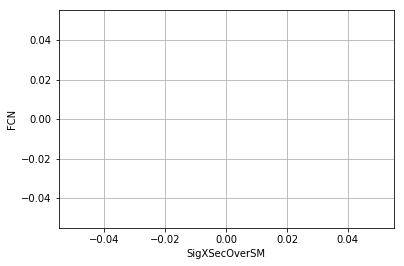

In [18]:
minimiser.draw_mnprofile('SigXSecOverSM')